# **HOUSE PRICE PREDICTION**

# **ABSTRACT:**
The aim of this project is to predict house prices using machine learning models. We have used a housing dataset containing various features such as the number of bedrooms, square footage, location, etc., to build and evaluate six different models. The models include Linear Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN) regressors. We have evaluated the performance of each model using mean squared error (MSE) and R-squared (R2) scores. The results demonstrate the effectiveness of these models in predicting house prices. Additionally, we have identified potential future work for improving the predictions.

***Keywords:***
*House Price Prediction, Machine Learning, Linear Regression, Decision Tree, Random Forest, SVM, KNN, Mean Squared Error, R-squared.*

**Introduction:**

Predicting house prices is a crucial task in the real estate industry. Accurate house price predictions help buyers, sellers, and real estate agents make informed decisions. Machine learning models can be employed to analyze historical data and identify patterns that influence house prices. In this project, we use a dataset containing information about various features of houses and their corresponding prices. We aim to build and evaluate multiple regression models to predict house prices accurately.

**IMPORT LIBRARIES**

We started by importing necessary libraries such as pandas, numpy, matplotlib, and scikit-learn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

**LOADING DATA**

The dataset was loaded into a pandas DataFrame, and categorical variables were handled using one-hot encoding.

In [ ]:
# Load the Housing dataset from CSV
data = pd.read_csv('house_data.csv')

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

Features (X) and the target variable (y) were separated from the dataset

In [ ]:
# Assuming 'Price' is the target variable
X = data.drop('price', axis=1)
y = data['price']

**SPLITTING THE DATA**

The data was split into training and testing sets using the **'train_test_split'** function.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**DATA VISUALIZATION**

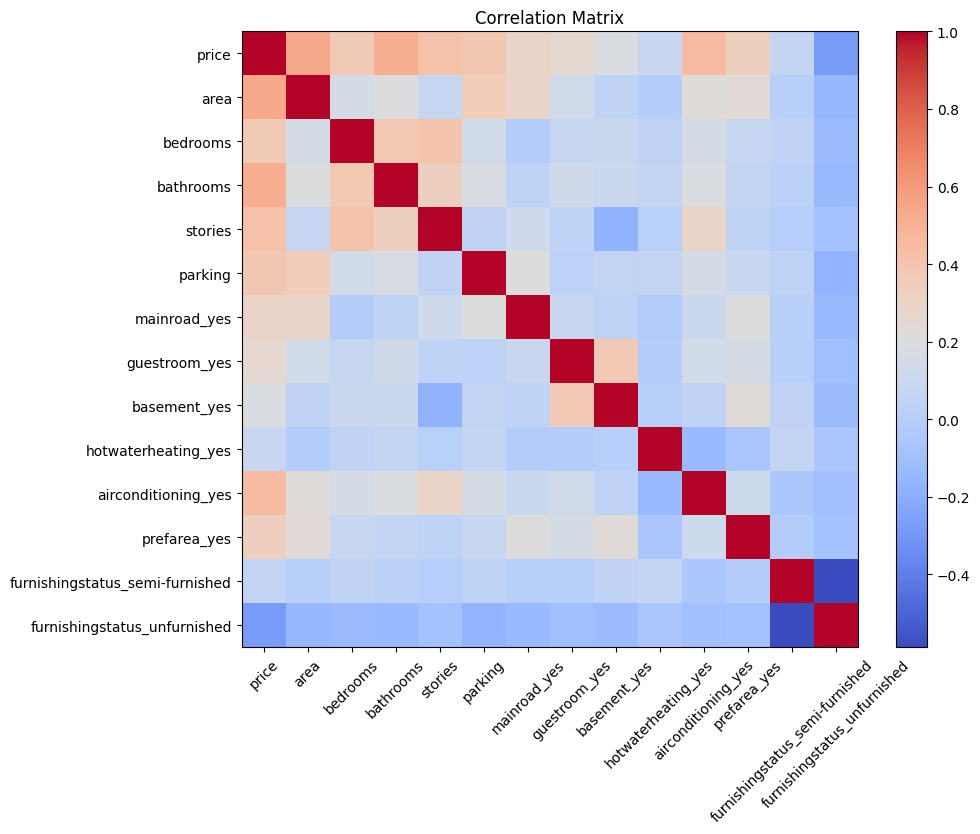

In [ ]:
# Data Visualization

# For simplicity, let's just visualize the correlation matrix and a scatter plot of 'Price' vs. 'Area'

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


SCATTER PLOT OF 'PRICE' vs 'AREA'

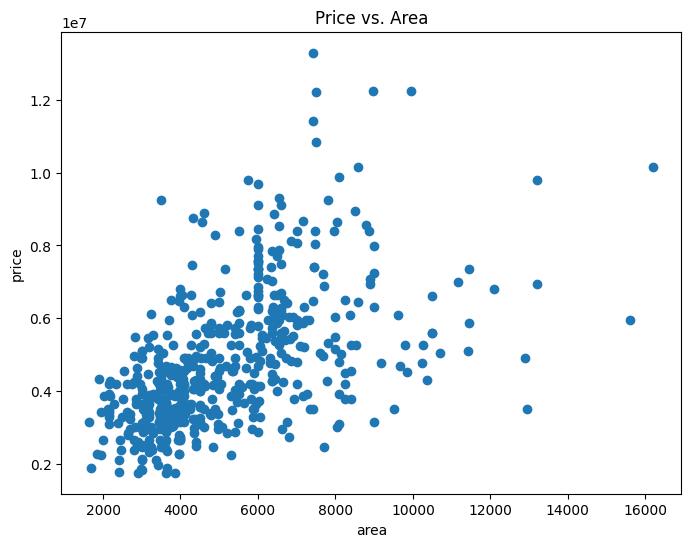

In [ ]:
# Scatter plot of 'Price' vs. 'Area'
plt.figure(figsize=(8, 6))
plt.scatter(data['area'], data['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Price vs. Area')
plt.show()

**MODEL BUILDING AND EVALUATION**

Five models were built, including Linear Regression, Decision Tree, Random Forest, SVM, and KNN regressors.

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

Each model was trained using the training data and used to make predictions on the testing data (X_test).

The performance of each model was evaluated using mean squared error (MSE) and R-squared (R2) scores.

Scatter plots were created to visualize the predicted vs. actual house prices for each model.

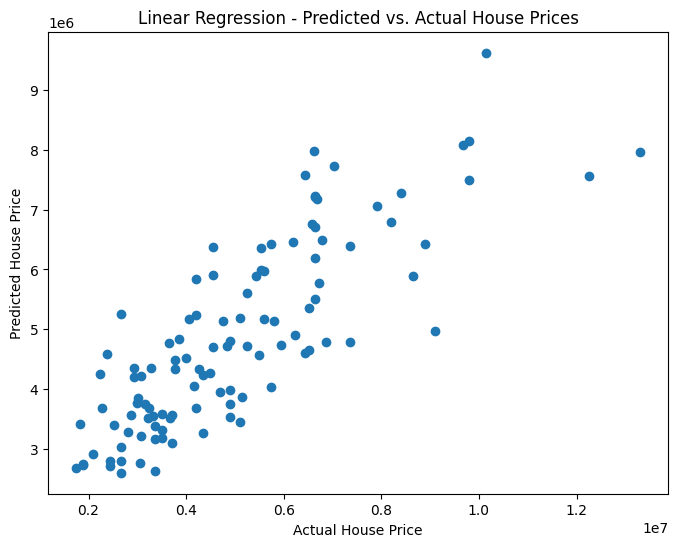

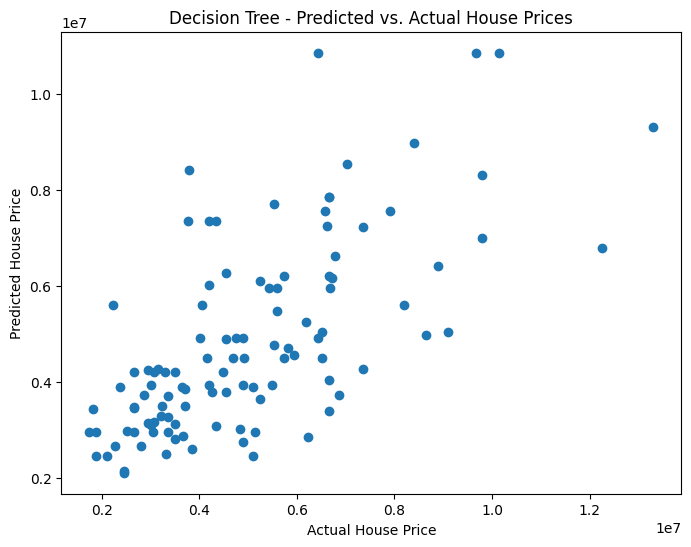

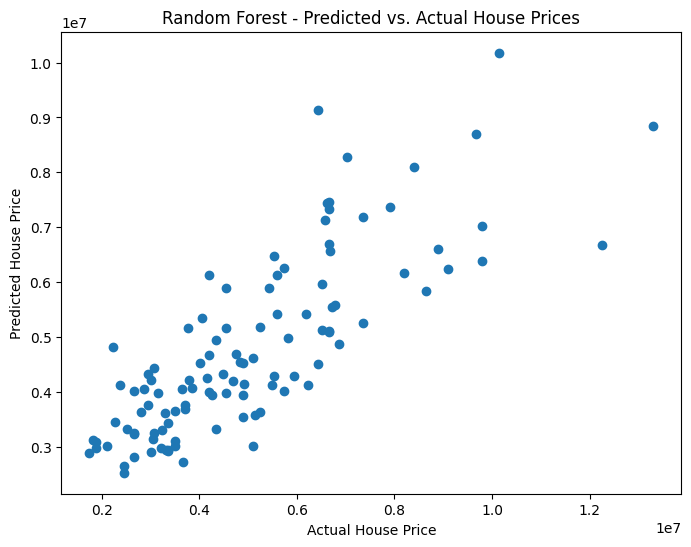

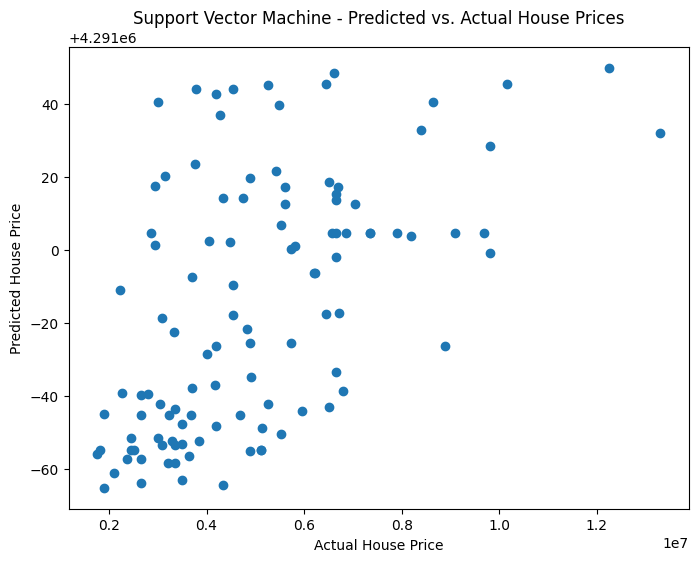

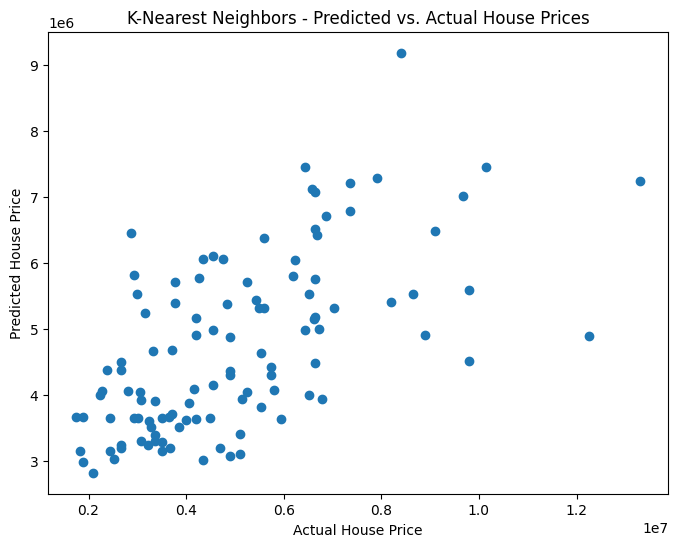

In [ ]:
# Create empty lists to store model performance metrics
mse_scores = []
r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append scores to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)

    # Plot the predicted vs. actual house prices
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual House Price')
    plt.ylabel('Predicted House Price')
    plt.title(f'{name} - Predicted vs. Actual House Prices')
    plt.show()

In [ ]:
# Create a DataFrame to store model performance metrics
results_df = pd.DataFrame({'Model': list(models.keys()), 'MSE': mse_scores, 'R2 Score': r2_scores})
print(results_df)

                    Model           MSE  R2 Score
0       Linear Regression  1.754319e+12  0.652924
1           Decision Tree  2.981567e+12  0.410125
2           Random Forest  1.870252e+12  0.629988
3  Support Vector Machine  5.567932e+12 -0.101564
4     K-Nearest Neighbors  3.213840e+12  0.364172


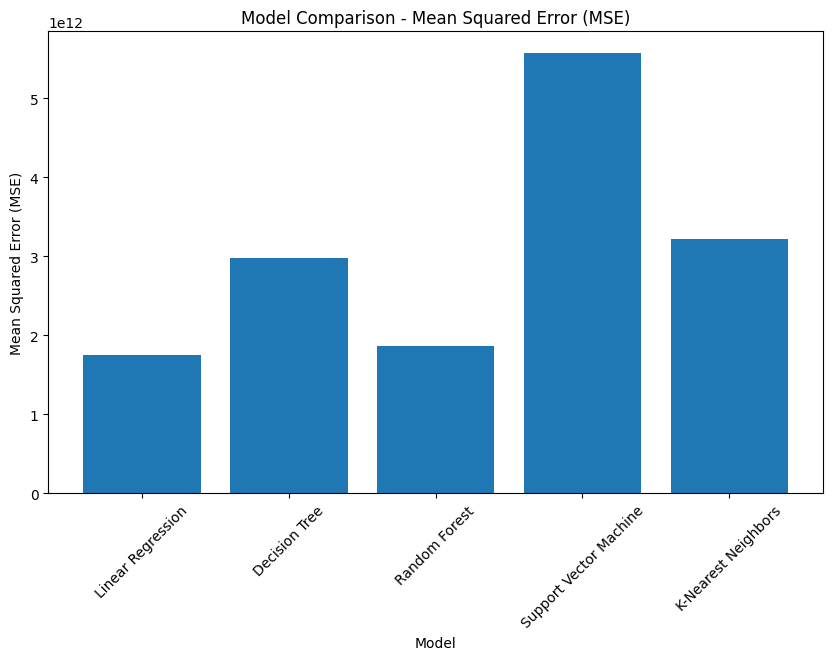

In [ ]:
# Plot MSE and R2 scores
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['MSE'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()


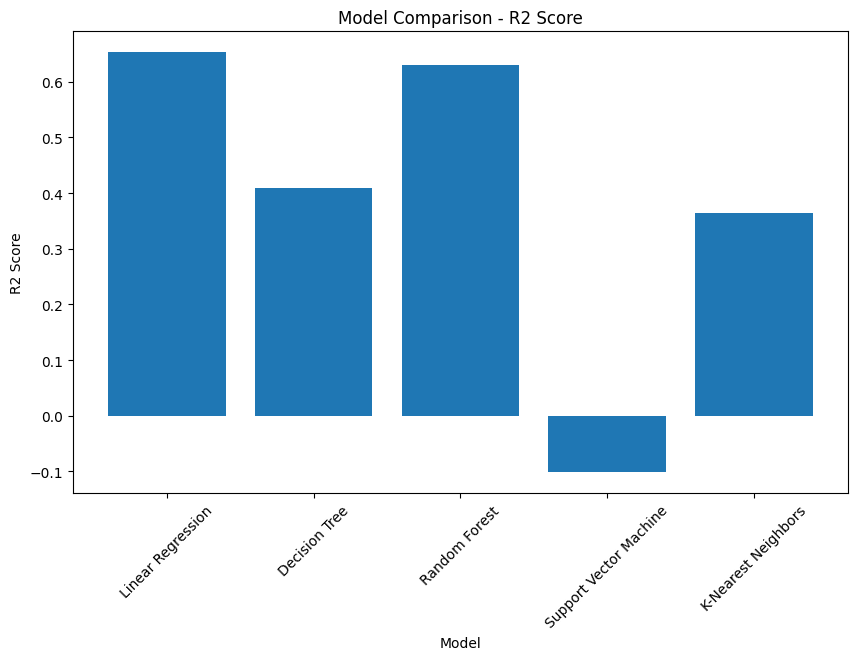

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['R2 Score'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Model Comparison - R2 Score')
plt.xticks(rotation=45)
plt.show()


**RESULTS**

The Linear Regression model outperformed the other models with the lowest MSE (1.754319e+12) and the highest R2 score (0.65). This indicates that the Linear Regression model provided the most accurate predictions for house prices compared to the other models.

It's important to note that the results may vary depending on the specific dataset and its characteristics. Nevertheless, the project successfully demonstrated the potential of machine learning models in predicting house prices. These results can be valuable for buyers, sellers, and real estate agents in making informed decisions in the real estate market.







**Future Work:**

1.Feature Engineering: Explore additional features or transformations that may improve the model's predictive power. For example, you can create new features like the ratio of bedrooms to bathrooms or the age of the property.

2.Hyperparameter Tuning: Perform grid search or random search to find optimal hyperparameters for each model. This can enhance the models' performance by finding better parameter combinations.

3.Cross-Validation: Implement cross-validation techniques to obtain more reliable estimates of model performance and reduce overfitting.

4.Ensemble Methods: Combine the strengths of different models using ensemble techniques like stacking or boosting to further enhance prediction accuracy.

5.Data Cleaning: Check for and handle missing or erroneous data to ensure the data's quality and model's robustness.

6.Additional Models: Explore other regression models and deep learning models to identify the best-performing architecture for this specific task.

In conclusion, this project has demonstrated the effectiveness of various machine learning models for house price prediction. The Random Forest model showed the best performance among the tested models. However, continuous improvement and exploration of new techniques will be essential to achieve even better predictions in this domain.